# Exploratory Data Analysis

## Import packages

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import numpy as np
from datetime import date

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [4]:
#Read in data
client = pd.read_csv('./client_data.csv')
price = pd.read_csv('./price_data.csv')

# Checking data

## Client data

In [5]:
client.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
#Check for null values
np.sum(pd.isnull(client))

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

It is suspicious that there are no missing data in the dataset. I will dive deeper into the data to understand if missing data had been imputed with other values.

In [8]:
cat_vars=list(client.select_dtypes(['object']).columns)

In [9]:
cat_vars.remove('id')
print(cat_vars)

['channel_sales', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'has_gas', 'origin_up']


In [10]:
for i in cat_vars:
    print(client[[i]].value_counts())

channel_sales                   
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
dtype: int64
date_activ
2009-08-01    95
2010-02-01    92
2009-09-01    76
2009-10-01    55
2010-01-11    48
              ..
2008-03-11     1
2008-04-03     1
2008-04-04     1
2008-04-09     1
2003-05-09     1
Length: 1796, dtype: int64
date_end  
2016-02-01    145
2016-08-01    125
2016-09-01    117
2016-10-05    115
2016-12-31    104
             ... 
2017-06-11      1
2017-01-28      1
2017-01-29      1
2017-06-01      1
2017-06-13      1
Length: 368, dtype: int64
date_modif_prod
2015-11-01         721
2015-05-24         269
2015-12-17         199
2015-09-20         173
2015-12-16         172
                  ... 
2014-08-29  

No wonder! Missing values have been imputed with 'MISSING', which is detected as a value. Let us examine how many missing values there are.

In [11]:
for i in cat_vars:
    print(i+' has {} missing values'.format(len(client[client[i]=='MISSING'])))

channel_sales has 3725 missing values
date_activ has 0 missing values
date_end has 0 missing values
date_modif_prod has 0 missing values
date_renewal has 0 missing values
has_gas has 0 missing values
origin_up has 64 missing values


So only channel_sales and origin_up variables have imputed 'MISSING' values.

### Missing values handling

**channel sales**: Code of the sales channel  
**origin_up**: code of the electricity campaign the customer first subscribed to

In this case, missing values in sales channel is acceptable, since it could mean that customers found the company organically rather than through third-party partners.

Similarly, missing values in origin_up column is acceptable as customers may not have subscribed to an electricity campaign.


### Date formatting

The data variables in our dataset were parsed in as strings. We can convert them to proper datetime formats.

In [12]:
# Identify date variables
date_vars=client.columns[client.columns.str.contains('date')]

In [13]:
for i in date_vars:
    client[i]=pd.to_datetime(client[i])

## Price data

In [14]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [15]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [16]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Prices for *'price_mid_peak_var', 'price_peak_fix'* and *'price_mid_peak_fix'* are heavily skewed, as the 25% and 50% quantiles are 0.

In [17]:
price.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

### Date formatting

In [18]:
price['price_date']=pd.to_datetime(price['price_date'])

# Data Visualization


In this segment, I aim to identify potential factors that lead to high churn rates. This could be the level of seniority of customers, the types of sales channel, etc.  

I will not be visualizing forecasts or dates; While important, they are less relevant for our analysis on customer churn.

Read in the functions kindly provided by BCG GAMMA for plots.

In [19]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

## Customer Churn

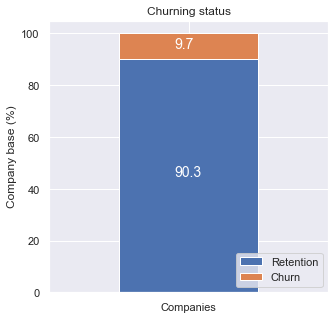

In [20]:
churn = client[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

Overall, around 10% of customers churned over the next 3 months.

## Consumption

Modifying the code provided by BCG GAMMA, we can plot univariate distributions in the consumption list while also indicating churn levels.

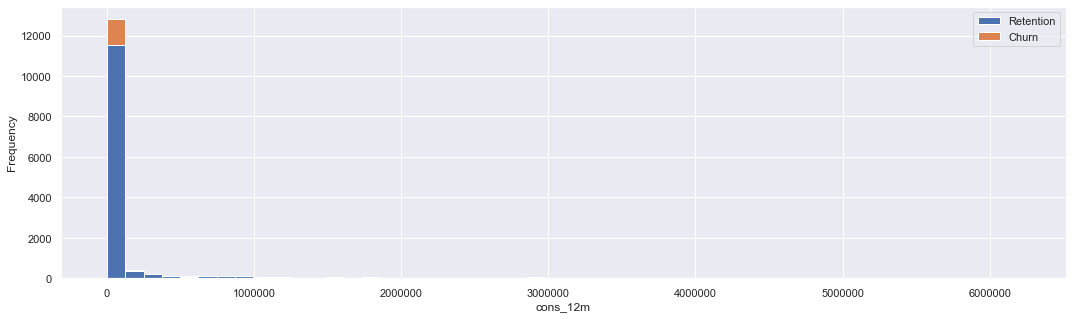

In [21]:
#From BCG
consumption = client[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

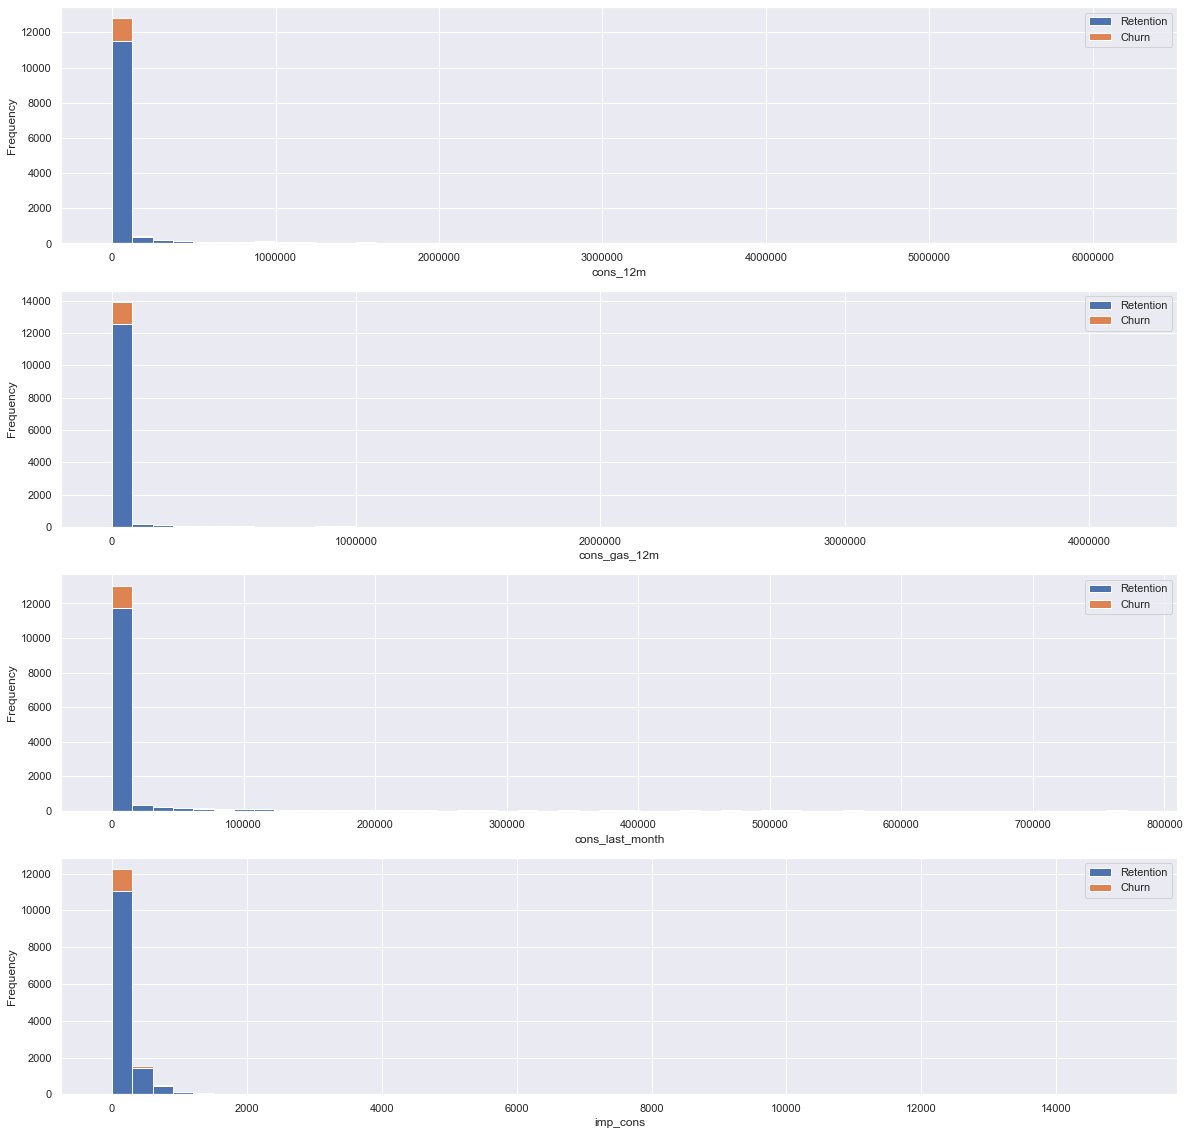

In [22]:
#Modified
consumption = client[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
cons=client[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']]
fig, axs = plt.subplots(nrows=len(cons.columns), figsize=(20, 20))
for i in cons:
    plot_distribution(consumption,i, axs[cons.columns.get_loc(i)])

In [23]:

for i in consumption:
    print(i+' Values: \n {} \n'.format(client[i].value_counts()))

id Values: 
 7ced14d545ecf417e8f444f5f42b8a14    1
d03a3d788298e6e7d4458b0967f0a84e    1
ffb70452760f65e2f4976cef3fc563ff    1
c10921c132d550710d9e413e3e3fa40f    1
915482f566239d108fe4a453c0053657    1
                                   ..
3aaa7ecd6ac7649c7e0086e1d140868a    1
367b207793777bfa4cb584861a23e50d    1
3f2be244f70a31d55a8822f4349f0138    1
b1df573a958947d3560a61dcc76b5d6d    1
ed37cfa026c212660ce235b69eef578b    1
Name: id, Length: 14606, dtype: int64 

cons_12m Values: 
 0          117
2882597     27
3329244     24
6207104     18
1743025     18
          ... 
8992         1
13090        1
8403         1
17188        1
2047         1
Name: cons_12m, Length: 11065, dtype: int64 

cons_gas_12m Values: 
 0          11994
976731        27
867921        24
41532         18
1959386       18
           ...  
922111         1
2572           1
53775          1
12819          1
5865           1
Name: cons_gas_12m, Length: 2112, dtype: int64 

cons_last_month Values: 
 0         4983

Consumption for electricity and gas is heavily concentrated around 0, or right-skewed.



## Examine sales channels

Understanding the different sales channels that led to customer conversion, and identify if any particular sales channels had greater churn rates. Then, it may be worthwhile to target our efforts toward customers of those channels.

In [24]:
client['channel_sales'].nunique()

8

In [25]:
#Setting up dataframe, and renaming channels to make our lives easier
channels = client[['id','channel_sales' ,'churn']]
channels['channel_sales']=channels['channel_sales'].replace({'epumfxlbckeskwekxbiuasklxalciiuu':'channel_1','ewpakwlliwisiwduibdlfmalxowmwpci':'channel_2',
                                 'fixdbufsefwooaasfcxdxadsiekoceaa':'channel_3','foosdfpfkusacimwkcsosbicdxkicaua':'channel_4',
                                  'lmkebamcaaclubfxadlmueccxoimlema':'channel_5','sddiedcslfslkckwlfkdpoeeailfpeds':'channel_6',
                                  'usilxuppasemubllopkaafesmlibmsdf':'channel_7'})

<ipython-input-25-40cf59824144>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channels['channel_sales']=channels['channel_sales'].replace({'epumfxlbckeskwekxbiuasklxalciiuu':'channel_1','ewpakwlliwisiwduibdlfmalxowmwpci':'channel_2',


In [26]:
channels=channels.groupby([channels['channel_sales'],channels['churn']]).count().unstack(level=1)

In [27]:
channels_perc = (channels.div(channels.sum(axis=1,level=0),level=0))*100
channels_perc.head()

id           
churn                   0          1
channel_sales                       
MISSING         92.402685   7.597315
channel_1      100.000000        NaN
channel_2       91.601344   8.398656
channel_3      100.000000        NaN
channel_4       87.859046  12.140954

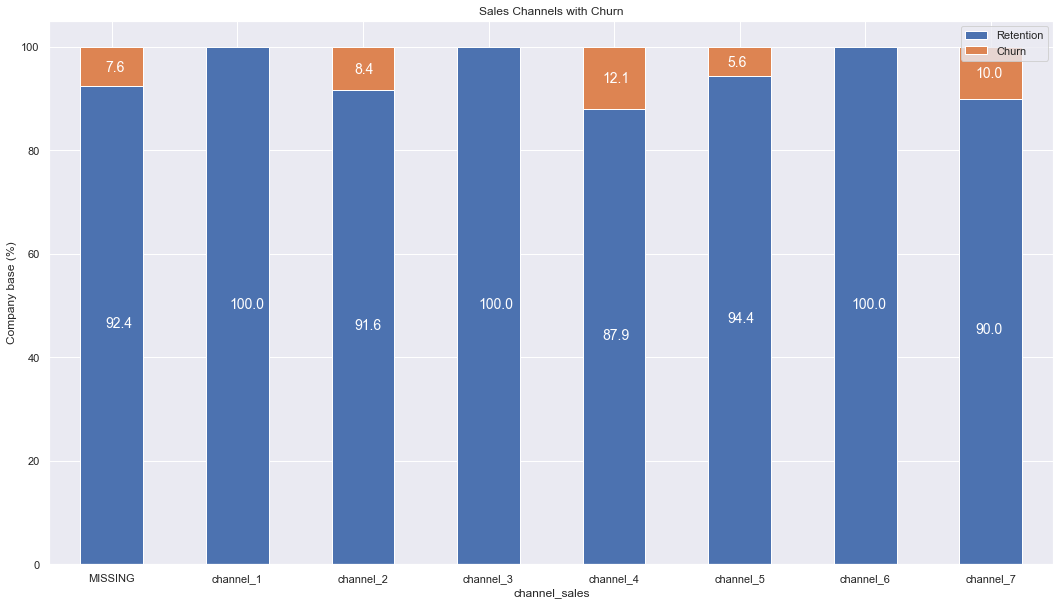

In [28]:
plot_stacked_bars(channels_perc,'Sales Channels with Churn')

Across the different sales channels, there does not seem to be any channel that is contributing to high churn rates.

## Customer Seniority

Examine churn rates for customers of different seniority

In [29]:
num_years = client[['id','num_years_antig' ,'churn']]
num_years=num_years.groupby([num_years['num_years_antig'],num_years['churn']]).count().unstack(level=1)
num_years_perc = (num_years.div(num_years.sum(axis=1,level=0),level=0))*100
num_years_perc.head()

id           
churn                     0          1
num_years_antig                       
1                100.000000        NaN
2                 72.727273  27.272727
3                 86.477600  13.522400
4                 88.146660  11.853340
5                 91.368148   8.631852

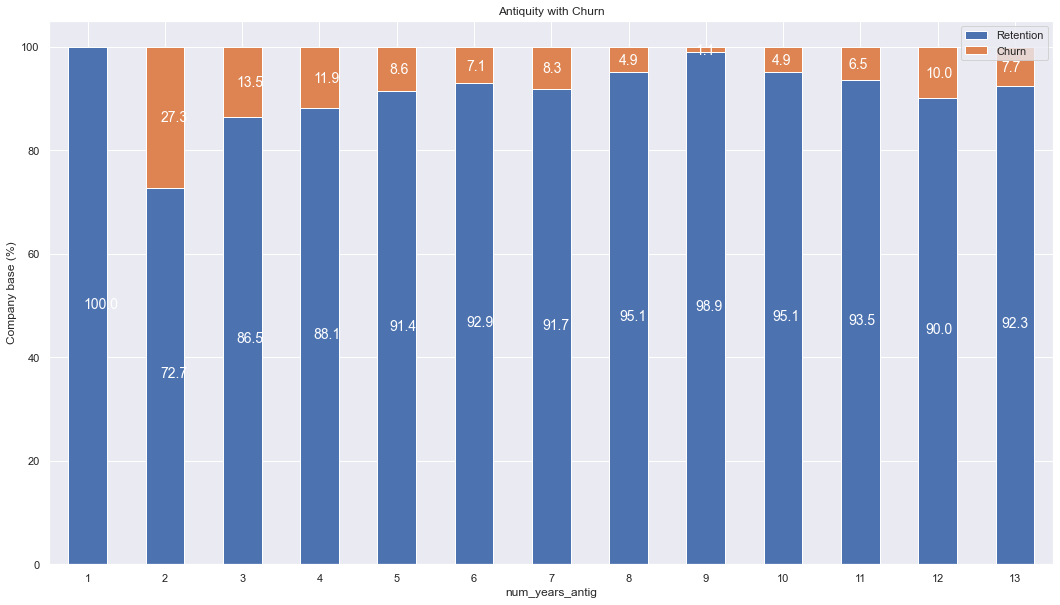

In [30]:
plot_stacked_bars(num_years_perc,'Antiquity with Churn')

Customers of 2 years have the highest churn rate, at 27.3%. This could be the potential segment that we target, to reduce churn.

# Price Data

In [31]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [32]:
#Check for nulls
np.sum(pd.isnull(price))

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [33]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## Price Sensitivity
  
Typically, price sensitivity measures the change in quantity demanded given a change in price. If a product is more price 'elastic', then a price increase would lead to greater fall in quantity demanded, or even churn.  

A formula we could use in this case would be:   
$\begin{equation}  
\Delta Q/Q / \Delta P/P
\end{equation}$

Here, we can use churn as an indicator of quantity demanded, since customer churn means they no longer value the service sufficiently at that price to purchase it.

In [34]:
#Get sensitivity for a year
year_sens=price.groupby(['id','price_date']).mean().groupby(['id']).var().reset_index()
year_sens.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000


In [35]:
#Get sensitivity for the past 6 months
six_sens=price[price['price_date']>'2015-06-01'].groupby(['id','price_date']).mean().groupby(['id']).var().reset_index()
six_sens.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0
3,0010ee3855fdea87602a5b7aba8e42de,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0
4,00114d74e963e47177db89bc70108537,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0


In [36]:
# Rename columns
year_sens = year_sens.rename(
columns={
"price_off_peak_var": "var_year_price_p1_var",
"price_peak_var": "var_year_price_p2_var",
"price_mid_peak_var": "var_year_price_p3_var",
"price_off_peak_fix": "var_year_price_p1_fix",
"price_peak_fix": "var_year_price_p2_fix",
"price_mid_peak_fix": "var_year_price_p3_fix"
}
)

In [37]:
six_sens = six_sens.rename(
columns={
"price_off_peak_var": "var_6m_price_p1_var",
"price_peak_var": "var_6m_price_p2_var",
"price_mid_peak_var": "var_6m_price_p3_var",
"price_off_peak_fix": "var_6m_price_p1_fix",
"price_peak_fix": "var_6m_price_p2_fix",
"price_mid_peak_fix": "var_6m_price_p3_fix"
}
)

In [38]:
#Merge dataframes

price_features=pd.merge(year_sens,six_sens,on='id')

In [39]:
price_features.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0


In [40]:
#Include churn data to test our hypothesis that price sensitivity is correlated with churn

price_analysis=pd.merge(price_features,client[['id','churn']],on='id')
price_analysis.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0


In [41]:
#Investigate correlation between price and churn

<AxesSubplot:>

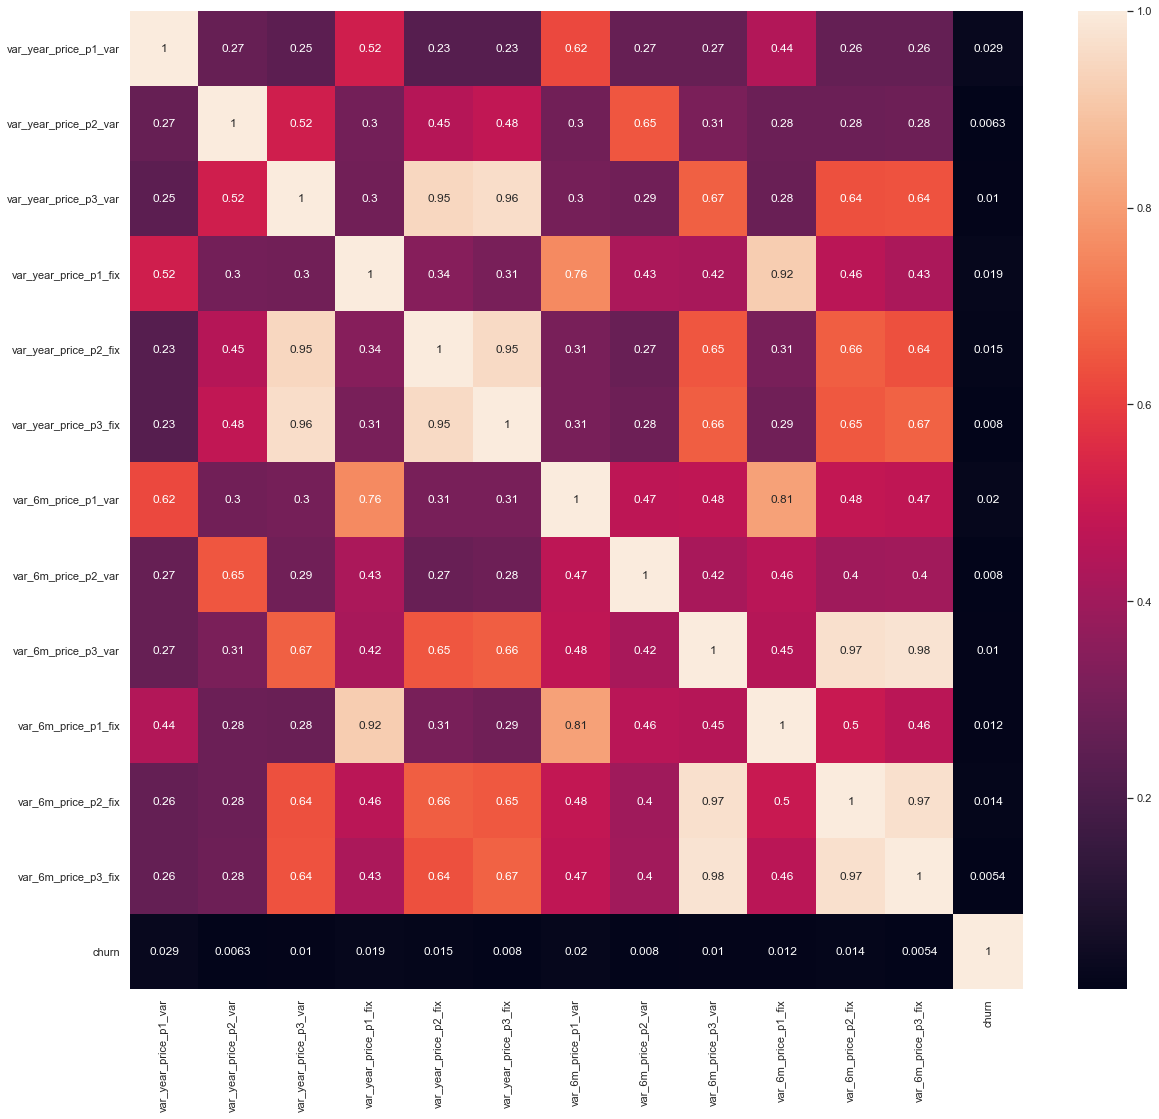

In [42]:
corr_plot=price_analysis.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr_plot,annot=True)

From the correlation plot, churn and price sensitivity are weakly-related. This seems to contradict our hypothesis, and we may have to engineer more variables to further test the hypothesis.

In [43]:
merged_data = pd.merge(client.drop(columns=['churn']), price_analysis,on='id')

In [44]:
merged_data.to_csv('clean_data.csv')